In [4]:
from datasets import load_dataset
from matplotlib import pyplot as plt
import pandas as pd
dataset=load_dataset('lukebarousse/data_jobs') 

c:\Users\pheli\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df=dataset['train'].to_pandas()

In [6]:
df['job_posted_date']=pd.to_datetime(df.job_posted_date)

In [7]:
import ast
def clean_list(skill_list):
    if pd.notna(skill_list):
       return ast.literal_eval(skill_list)
df['job_skills']=df['job_skills'].apply(clean_list)

In [8]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


(0.0, 206062.5)

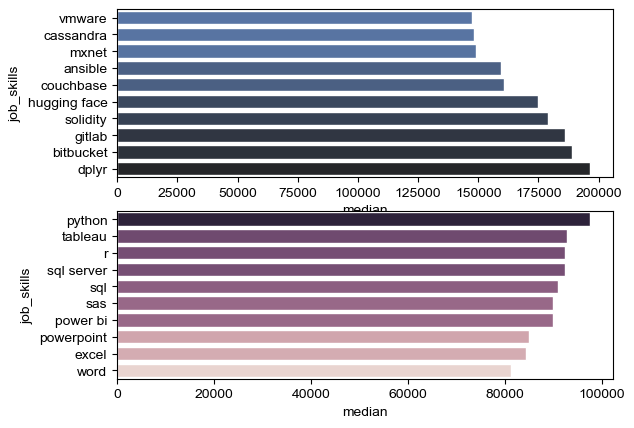

In [19]:
import seaborn as sns
job_titles=['Data Analyst']
df_DA_USA = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_DA_USA
df_DA_USA = df_DA_USA.dropna(subset=['salary_year_avg'])
df_DA_USA=df_DA_USA.explode('job_skills')
df_DA_USA[['job_skills','salary_year_avg']]
df_DA_USA_group=df_DA_USA.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_Top_pay=df_DA_USA_group.sort_values(by='median',ascending=False).head(10)
df_DA_Top_pay
df_da_skills=df_DA_USA_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
df_da_skills

fig,ax=plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.barplot(data=df_DA_Top_pay,x='median',y=df_DA_Top_pay.index,ax=ax[0],hue='median',palette='dark:b_r')
ax[0].legend().remove()
# df_DA_Top_pay.plot(kind='barh',y='median',ax=ax[0])
ax[0].invert_yaxis()
# df_da_skills.plot(kind='barh',y='median',ax=ax[1])
sns.barplot(data=df_da_skills,x='median',y=df_da_skills.index,ax=ax[1],hue='median')
ax[1].legend().remove()
ax[0].set_xlim(ax[0].get_xlim())
